# Exploratory Data Analysis and Visualization Final Project - A2 Group 2 - Analysis of the EU Battle Against Climate Change

Author: Abdul Rehman, Shubham Goel, Yi-Hsueh Yang

Date: Dec 9, 2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The datasets we are using are as follows:


1. Global Temperature Data
2. Sea Levels Data
3. Glacier Levels Data
4. EU ETS Emissions Data
5. Global Emissions Data


We chose not to merge all the data together since the emissions data is pretty complete in which we will use mainly for our story telling. All for the temperature, sea level and glacier data, they are more of supportive datasets to create some graphs to justify the arguments we make. Therefore, data will stay seperated as there is no clear reason for us to merge.  

All of our datasets are filtered with the year from 2005-2014 which is the intersaction we have for all the datasets. The following sections will detail how we used each dataset:

## Some Pre-work before loading datasets

In [ ]:
pip install datapackage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geopandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import geopandas as gpd
import seaborn as sns
from datapackage import Package

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### **1. Global Temperature Data**
Data Source: https://datahub.io/core/global-temp#python

This dataset is surved as a supportive dataset to plot out the temperature changing trend from 2005-2014 to help explain the job that European countries has done in decreasing the emission over years.

In [255]:
# This is the download guidelines from the data source.
package = Package('https://datahub.io/core/global-temp/datapackage.json')
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        test = resource.read()
# Create a new dataframe to fill in all the data point we obtained from the web.
df = pd.DataFrame(columns=['Type', 'Year', 'Temperature'])

for i in range(len(test)):
    df.loc[i,'Type'] = test[i][0]
    df.loc[i,'Year'] = test[i][1]
    df.loc[i,'Temperature'] = test[i][2]
print(df.head())

      Type        Year Temperature
0     GCAG  2016-12-06      0.7895
1  GISTEMP  2016-12-06        0.81
2     GCAG  2016-11-06      0.7504
3  GISTEMP  2016-11-06        0.93
4     GCAG  2016-10-06      0.7292


In [256]:
df.dtypes # We can see that we need some manipulation toward the data type of Year and Temperature.

Type           object
Year           object
Temperature    object
dtype: object

In [257]:
# convert column 'Year' and 'Temperature' to datetime and float.
df['Year'] = pd.to_datetime(df['Year'])
df['Temperature'] = df['Temperature'].astype(float)

In [258]:
# filtering data from 2005 to 2014
temp = df[df.Year.dt.year >= 2005]
temp = temp[temp.Year.dt.year <= 2014].reset_index(drop=True)

In [259]:
# The dataset is pretty clean and has no missing value to handle.
temp.isnull().sum()

Type           0
Year           0
Temperature    0
dtype: int64

In [260]:
# Done cleaning for temperature dataset
temp.head()

,Type,Year,Temperature
0,GCAG,2014-12-06,0.8308
1,GISTEMP,2014-12-06,0.7900
2,GCAG,2014-11-06,0.6895
3,GISTEMP,2014-11-06,0.6700
4,GCAG,2014-10-06,0.7851


In [261]:
Temp = temp

In [283]:
Temp.index = Temp['Year']

<AxesSubplot:xlabel='Year'>

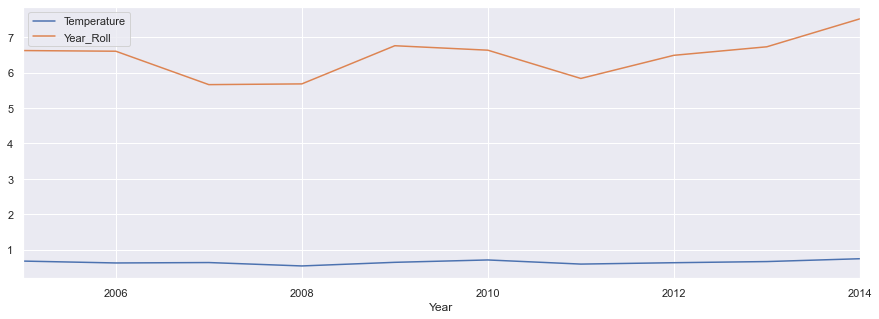

In [284]:
Temp.resample('Y').mean().plot(figsize=(15,5))

### **2. Sea Levels Data**

In [ ]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
#read the required dataset in the dataframe
sea_level = pd.read_csv("csiro_alt_gmsl_mo_2015_csv.csv")
sea_level.head()

,Time,GMSL
0,1993-01-15,-1.6
1,1993-02-15,-3.4
2,1993-03-15,5.5
3,1993-04-15,0.1
4,1993-05-15,5.3


In [273]:
#check what data is the dataset
sea_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    266 non-null    object 
 1   GMSL    266 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [274]:
#convert the datatype of 'Time' column from object to datatime
sea_level['Time'] = pd.to_datetime(sea_level['Time'])

In [275]:
#verify the datatype
sea_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    266 non-null    datetime64[ns]
 1   GMSL    266 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


In [276]:
#check the null values in the dataset
sea_level.isnull().sum()

Time    0
GMSL    0
dtype: int64

In [277]:
#visualise the statistics of the dataset
sea_level.describe()

,GMSL
count,266.000000
mean,36.028571
std,20.889803
min,-3.500000
25%,20.525000
50%,36.700000
75%,52.500000
max,79.500000


In [278]:
#changing the index of the dataset
sea_level=sea_level.set_index('Time')
sea_level.head()

,GMSL
Time,
1993-01-15,-1.6
1993-02-15,-3.4
1993-03-15,5.5
1993-04-15,0.1
1993-05-15,5.3


<AxesSubplot:>

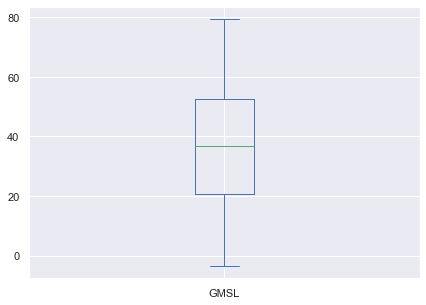

In [279]:
#plot the box plot of the original dataset after the no NULL values
sea_level['GMSL'].plot(kind='box', figsize=(7,5))

In [280]:
#dropping/filtering the data before 2005, to make it in sync with the datasets used for the project.
sea_filter1 = sea_level[(sea_level.index > '2004-12-31')]

In [281]:
#dropping/filtering the data after 2014, to make it in sync with the datasets used for the project.
sea_filter2 = sea_filter1[(sea_filter1.index < '2015-01-01')]

In [282]:
sea_filter2

,GMSL
Time,
2005-01-15,38.1
2005-02-15,40.9
2005-03-15,42.5
2005-04-15,40.5
2005-05-15,41.4
...,...
2014-08-15,73.5
2014-09-15,70.2
2014-10-15,71.7


In [285]:
#cross check the statistics of the filtered data
sea_filter2.describe()

,GMSL
count,120.000000
mean,54.363333
std,10.494760
min,38.100000
25%,43.850000
50%,53.050000
75%,64.900000
max,76.000000


<AxesSubplot:xlabel='Time'>

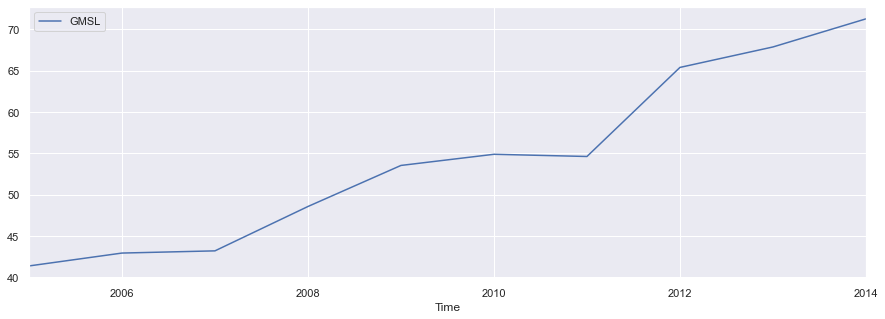

In [286]:
#ploting the time series graph for the filtered data
sea_filter2.resample('Y').mean().plot(figsize=(15,5))

### **3. Glacier Levels Data**

In [287]:
#read the required dataset in the dataframe
glacier = pd.read_csv("glaciers_csv.csv")
glacier.head()

,Year,Mean cumulative mass balance,Number of observations
0,1945,0.00,NaN
1,1946,-1.13,1.0
2,1947,-3.19,1.0
3,1948,-3.19,1.0
4,1949,-3.82,3.0


In [288]:
#check what data is the dataset
glacier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          70 non-null     int64  
 1   Mean cumulative mass balance  70 non-null     float64
 2   Number of observations        69 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [289]:
#check the null values in the dataset
glacier.isnull().sum()

Year                            0
Mean cumulative mass balance    0
Number of observations          1
dtype: int64

In [290]:
glacier[glacier.isnull().any(axis=1)]

,Year,Mean cumulative mass balance,Number of observations
0,1945,0.0,NaN


In [291]:
#convert the datatype of 'Time' column from object to datatime
glacier['Year'] = pd.to_datetime(glacier['Year'].astype(str), format='%Y')

In [292]:
glacier.head()

,Year,Mean cumulative mass balance,Number of observations
0,1945-01-01,0.00,NaN
1,1946-01-01,-1.13,1.0
2,1947-01-01,-3.19,1.0
3,1948-01-01,-3.19,1.0
4,1949-01-01,-3.82,3.0


In [293]:
glacier=glacier.set_index('Year')
glacier.head()

,Mean cumulative mass balance,Number of observations
Year,,
1945-01-01,0.00,NaN
1946-01-01,-1.13,1.0
1947-01-01,-3.19,1.0
1948-01-01,-3.19,1.0
1949-01-01,-3.82,3.0


In [294]:
#droping the column
glacier = glacier[["Mean cumulative mass balance"]]
glacier.head()

,Mean cumulative mass balance
Year,
1945-01-01,0.00
1946-01-01,-1.13
1947-01-01,-3.19
1948-01-01,-3.19
1949-01-01,-3.82


<AxesSubplot:xlabel='Year'>

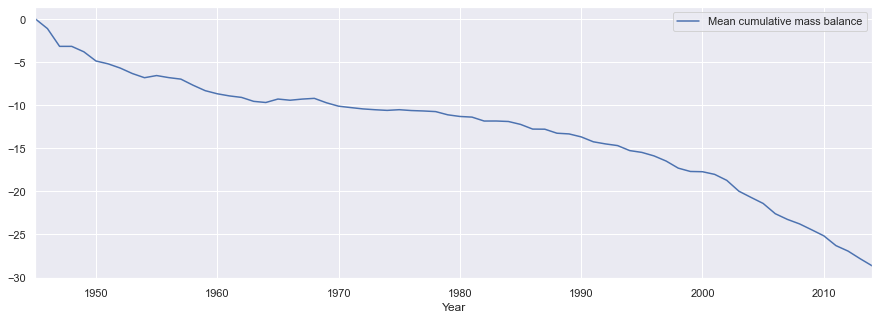

In [295]:
#ploting the time series graph for the filtered data
glacier.resample('Y').mean().plot(figsize=(15,5))

In [296]:
#dropping/filtering the data before 2005, to make it in sync with the datasets used for the project.
glacier1 = glacier[(glacier.index > '2004-12-31')]

In [297]:
#dropping/filtering the data after 2014, to make it in sync with the datasets used for the project.
glacier2 = glacier1[(glacier1.index < '2015-01-01')]

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Average mass of measured glacier')]

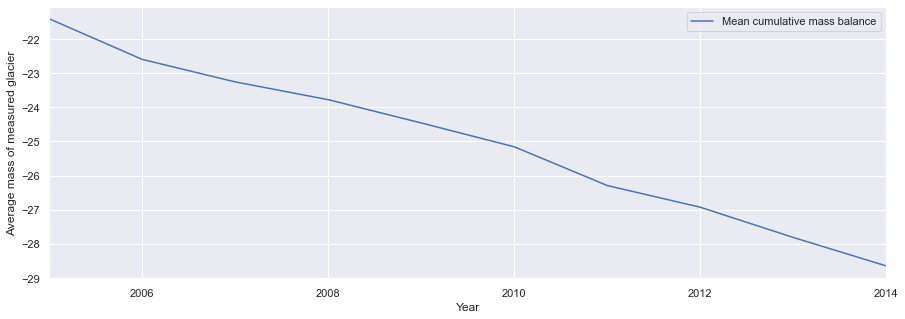

In [298]:
#ploting the time series graph for the filtered data
plt = glacier2.resample('Y').mean().plot(figsize=(15,5))
plt.set(xlabel = 'Year', ylabel = 'Average mass of measured glacier')

### **4. EU ETS Emissions Data**
Data source: https://datahub.io/core/eu-emissions-trading-system

This datasets serve as one of the main datasets to represent the green house gas emissions from each european countries over years. The dataset also consists of sector info and ETS info for us to show the emissions different between sectors and the amount of emissions from different kinds of trading methods under ETS.

In [98]:
# This is the download guidelines from the data source.
package = Package('https://datahub.io/core/eu-emissions-trading-system/datapackage.json')
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        test_eu = resource.read()
# Create a new dataframe to fill in all the data point we obtained from the web.
# We found out that the last column 'unit' contains the same data all the way down, so we are not filling it into our dataframe.
df2 = pd.DataFrame(columns=['country_code', 'country', 'main_activity_sector_name', 'ETS_info', 'year', 'value'])

for i in range(len(test_eu)):
    if isinstance(test_eu[i][4], str): # only getting str for the column 'year'
        df2.loc[i,'country_code'] = test_eu[i][0]
        df2.loc[i,'country'] = test_eu[i][1]
        df2.loc[i,'main_activity_sector_name'] = test_eu[i][2]
        df2.loc[i,'ETS_info'] = test_eu[i][3]
        df2.loc[i,'year'] = test_eu[i][4]
        df2.loc[i,'value'] = test_eu[i][5]
print(df2.head())


  country_code  country main_activity_sector_name  \
0           AT  Austria               10 Aviation   
1           AT  Austria               10 Aviation   
2           AT  Austria               10 Aviation   
3           AT  Austria               10 Aviation   
4           AT  Austria               10 Aviation   

                                            ETS_info  year value  
0        1. Total allocated allowances (EUA or EUAA)  2005     0  
1  1.2 Correction to freely allocated allowances ...  2005     0  
2  1.3 Allowances auctioned or sold (EUAs and EUAAs)  2005     0  
3     4.1 Surrendered EU allowances (EUAs and EUAAs)  2005     0  
4  4.2 Surrendered certified emission reductions ...  2005     0  


In [99]:
df_eu = df2 
df_eu.isnull().sum() # no missing data here

country_code                 0
country                      0
main_activity_sector_name    0
ETS_info                     0
year                         0
value                        0
dtype: int64

In [100]:
df_eu.dtypes # We can see that we need some manipulation toward the data type of year and value.
df_eu.year.unique() # There is inconsistent format in the column, having some rows with aggregated data.

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', 'Total 1st trading period (05-07)',
       'Total 2nd trading period (08-12)',
       'Total 3rd trading period (13-20)'], dtype=object)

In [101]:
# Using regex to get rid of the aggregated data in the column 'year'.
regex = '^\d{4}$'
df_eu = df_eu[df_eu['year'].str.match(regex)]

In [102]:
# convert column 'year' and 'value' to datetime and float.
df_eu['year'] = pd.to_datetime(df_eu['year'])
df_eu['value'] = df_eu['value'].astype(float)

/var/folders/zs/j91wn79j45lccf78212k1pp80000gn/T/ipykernel_2435/2357258845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu['year'] = pd.to_datetime(df_eu['year'])
/var/folders/zs/j91wn79j45lccf78212k1pp80000gn/T/ipykernel_2435/2357258845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu['value'] = df_eu['value'].astype(float)


In [103]:
# checking the amount and names in the sector column.
print(df_eu['main_activity_sector_name'].nunique())
print(df_eu['main_activity_sector_name'].unique())


30
['10 Aviation' '20 Combustion of fuels'
 '20-99 All stationary installations' '21  Refining of mineral oil'
 '21-99 All industrial installations (excl. combustion)'
 '22  Production of coke' '24  Production of pig iron or steel'
 '25 Production or processing of ferrous metals'
 '27 Production of secondary aluminium'
 '28 Production or processing of non-ferrous metals'
 '29 Production of cement clinker'
 '30 Production of lime, or calcination of dolomite/magnesite'
 '31 Manufacture of glass' '32 Manufacture of ceramics'
 '34 Production or processing of gypsum or plasterboard'
 '35 Production of pulp' '36 Production of paper or cardboard'
 '38 Production of nitric acid' '41 Production of ammonia'
 '42 Production of bulk chemicals'
 '99 Other activity opted-in under Art. 24'
 '26 Production of primary aluminium'
 '43 Production of hydrogen and synthesis gas'
 '44 Production of soda ash and sodium bicarbonate'
 '33 Manufacture of mineral wool' '23 Metal ore roasting or sintering'
 '37 P

In [104]:
# checking the amount and names in the ETS_info column.
print(df_eu['ETS_info'].nunique())
print(df_eu['ETS_info'].unique())

13
['1. Total allocated allowances (EUA or EUAA)'
 '1.2 Correction to freely allocated allowances (not reflected in EUTL)'
 '1.3 Allowances auctioned or sold (EUAs and EUAAs)'
 '4.1 Surrendered EU allowances (EUAs and EUAAs)'
 '4.2 Surrendered certified emission reductions (CERs)'
 '4.3 Surrendered emission reduction units (ERUs)' '2. Verified emissions'
 '1.1 Freely allocated allowances'
 '1.1.1 Free allocation to existing entities (Art. 10a(1))'
 '4. Total surrendered units'
 '1.1.2 Free allocation from the new entrants reserve (Art. 10a(7))'
 '1.1.3 Free allocation for modernisation of electricity generation (Art. 10c)'
 '3. Consistent scope correction to allowances and emissions since 2005']


In [105]:
# checking the amount and names in the ETS_info column.
# All country's name are perfect except 'NER 300 auctions'.
print(df_eu['country'].nunique())
print(df_eu['country'].unique())

32
['Austria' 'Belgium' 'Bulgaria' 'Cyprus' 'Czech Republic' 'Germany'
 'Denmark' 'Estonia' 'Spain' 'Finland' 'France' 'United Kingdom' 'Greece'
 'Croatia' 'Hungary' 'Ireland' 'Iceland' 'Italy' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Latvia' 'Malta' 'NER 300 auctions'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Sweden' 'Slovenia'
 'Slovakia']


In [106]:
# NER 300 auctions = Carbon emission rights
# This is the carbon emission rights set for trading passed in 2010 and started in 2013, 
# it allows the emission becomes a kind of product to be trade on the market.
# https://ir.theice.com/press/news-details/2012/ICE-Futures-Europe-Announces-NER-300-Auction-on-Behalf-of-European-Investment-Bank/default.aspx
df_eu[df_eu['country'] == 'NER 300 auctions']

,country_code,country,main_activity_sector_name,ETS_info,year,value
29733,NER300,NER 300 auctions,20-99 All stationary installations,1. Total allocated allowances (EUA or EUAA),2005-01-01,0.0
29734,NER300,NER 300 auctions,20-99 All stationary installations,1.3 Allowances auctioned or sold (EUAs and EUAAs),2005-01-01,0.0
29735,NER300,NER 300 auctions,20-99 All stationary installations,1. Total allocated allowances (EUA or EUAA),2006-01-01,0.0
29736,NER300,NER 300 auctions,20-99 All stationary installations,1.3 Allowances auctioned or sold (EUAs and EUAAs),2006-01-01,0.0
29737,NER300,NER 300 auctions,20-99 All stationary installations,1. Total allocated allowances (EUA or EUAA),2007-01-01,0.0
29738,NER300,NER 300 auctions,20-99 All stationary installations,1.3 Allowances auctioned or sold (EUAs and EUAAs),2007-01-01,0.0
29739,NER300,NER 300 auctions,20-99 All stationary installations,1. Total allocated allowances (EUA or EUAA),2008-01-01,0.0
29740,NER300,NER 300 auctions,20-99 All stationary installations,1.3 Allowances auctioned or sold (EUAs and EUAAs),2008-01-01,0.0
29741,NER300,NER 300 auctions,20-99 All stationary installations,1. Total allocated allowances (EUA or EUAA),2009-01-01,0.0
29742,NER300,NER 300 auctions,20-99 All stationary installations,1.3 Allowances auctioned or sold (EUAs and EUAAs),2009-01-01,0.0


In [412]:
# Done cleaning for EU_ETS dataset
euETS = df_eu
euETS.head()

,country_code,country,main_activity_sector_name,ETS_info,year,value
0,AT,Austria,10 Aviation,1. Total allocated allowances (EUA or EUAA),2005-01-01,0.0
1,AT,Austria,10 Aviation,1.2 Correction to freely allocated allowances ...,2005-01-01,0.0
2,AT,Austria,10 Aviation,1.3 Allowances auctioned or sold (EUAs and EUAAs),2005-01-01,0.0
3,AT,Austria,10 Aviation,4.1 Surrendered EU allowances (EUAs and EUAAs),2005-01-01,0.0
4,AT,Austria,10 Aviation,4.2 Surrendered certified emission reductions ...,2005-01-01,0.0


In [414]:
euETS = euETS[(euETS['main_activity_sector_name'] != '20-99 All stationary installations') & 
               (euETS['main_activity_sector_name'] != '21-99 All industrial installations (excl. combustion)')]
euETS

,country_code,country,main_activity_sector_name,ETS_info,year,value
0,AT,Austria,10 Aviation,1. Total allocated allowances (EUA or EUAA),2005-01-01,0.0
1,AT,Austria,10 Aviation,1.2 Correction to freely allocated allowances ...,2005-01-01,0.0
2,AT,Austria,10 Aviation,1.3 Allowances auctioned or sold (EUAs and EUAAs),2005-01-01,0.0
3,AT,Austria,10 Aviation,4.1 Surrendered EU allowances (EUAs and EUAAs),2005-01-01,0.0
4,AT,Austria,10 Aviation,4.2 Surrendered certified emission reductions ...,2005-01-01,0.0
...,...,...,...,...,...,...
41894,SK,Slovakia,42 Production of bulk chemicals,1.1.1 Free allocation to existing entities (Ar...,2014-01-01,275963.0
41895,SK,Slovakia,42 Production of bulk chemicals,1.1.2 Free allocation from the new entrants re...,2014-01-01,0.0
41896,SK,Slovakia,42 Production of bulk chemicals,1.1.3 Free allocation for modernisation of ele...,2014-01-01,0.0
41897,SK,Slovakia,42 Production of bulk chemicals,2. Verified emissions,2014-01-01,250126.0


### **5. Global Emissions Data**

This dataset contains CO2 emissions data for countries around the world. The data for certain countries goes as far back as 1751. For the purposes of our project and keeping in alignment with the other datasets we will reduce the scope to 2005 - 2014. We will plot the emissions data for 3 years in our range: 2005, 2010, and 2014. We will do this by continent and then zoom in on certain continents.

Reading in the emissions data

In [3]:
emissions_data=pd.read_csv('fossil-fuel-co2-emissions-by-nation_csv.csv')

Have a look at what the data looks like:

In [4]:
emissions_data.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


Check if we have any missing values in our columns:

In [5]:
emissions_data.isna().sum()/emissions_data.shape[0]

Year                           0.0
Country                        0.0
Total                          0.0
Solid Fuel                     0.0
Liquid Fuel                    0.0
Gas Fuel                       0.0
Cement                         0.0
Gas Flaring                    0.0
Per Capita                     0.0
Bunker fuels (Not in Total)    0.0
dtype: float64

There are no missing values in the data so there is no need for data imputation. We will need to see what values/ranges there are in the columns. 

Let's check the data types of our columns:

In [6]:
emissions_data.dtypes

Year                             int64
Country                         object
Total                            int64
Solid Fuel                       int64
Liquid Fuel                      int64
Gas Fuel                         int64
Cement                           int64
Gas Flaring                      int64
Per Capita                     float64
Bunker fuels (Not in Total)      int64
dtype: object

We're happy with the data types so we won't make any changes. We will need to filter the year later, and keeping it in int format will make that easier.

In [7]:
emission_list_of_countries_original = sorted(emissions_data['Country'].unique())

We want to filter to the time range in question: 2004 - 2014:

In [8]:
emissions_data = emissions_data[(emissions_data[['Year']] > 2004  ).all(axis=1)]
emissions_data = emissions_data[(emissions_data[['Year']] < 2015  ).all(axis=1)]
emissions_data.sample(100)

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
17136,2014,MARTINIQUE,627,0,607,0,20,0,1.58,124
15469,2006,TURKS AND CAICOS ISLANDS,39,0,39,0,0,0,1.18,0
17083,2014,FRENCH POLYNESIA,219,0,219,0,0,0,0.78,45
17159,2014,PAKISTAN,45350,3535,19726,17736,4352,0,0.25,263
16834,2013,CONGO,842,0,693,115,34,0,0.19,37
...,...,...,...,...,...,...,...,...,...,...
15689,2007,UGANDA,788,0,700,0,88,0,0.03,67
16688,2012,MACEDONIA,2445,1508,773,71,93,0,1.18,7
15950,2009,BURKINA FASO,527,0,450,0,77,0,0.03,13
15729,2008,BRAZIL,105708,15273,68994,13245,7056,1139,0.55,5238


In [9]:
emissions_list_of_countries_filtered = sorted(emissions_data['Country'].unique())

In [10]:
len(emissions_list_of_countries_filtered)

224

We'll briefly swap over to our map plotting data to see which countries we have there:

In [ ]:
map_df = gpd.read_file("/content/drive/MyDrive/EDA Project/World_Countries_(Generalized)/World_Countries__Generalized_.shx")
map_df

Create a list of the countries in the map dataset (capitalized)

In [ ]:
map_countries_original = map_df['COUNTRY']
map_countries_capitalize=[]
for country in map_countries_original:
    map_countries_capitalize.append(country.upper())

First we find the countries in the emissions data, that are not in the map data:

In [13]:
missing_list=[]
for country in emissions_list_of_countries_filtered:
    if country not in map_countries_capitalize:
        missing_list.append(country)
missing_list

NameError: name 'map_countries_capitalize' is not defined

After looking through the missing countries we find that a majority of them just need their names adjusted slightly. However there are a small amount that need to be removed from the emissions data since they won't be plotted:

In [15]:
my_file = open("countries_to_remove.txt", "r")
countries_to_remove_temp = my_file.read()
countries_to_remove =  countries_to_remove_temp.split('\n')
countries_to_remove

['HONG KONG SPECIAL ADMINSTRATIVE REGION OF CHINA',
 'MACAU SPECIAL ADMINSTRATIVE REGION OF CHINA',
 'MACEDONIA',
 'NETHERLAND ANTILLES',
 'SWAZILAND',
 'TAIWAN',
 'YUGOSLAVIA (MONTENEGRO & SERBIA)']

In [16]:
emissions_data = emissions_data[~emissions_data.Country.isin(countries_to_remove)]

In [17]:
len(emissions_data['Country'].unique())

217

In [18]:
emissions_list_of_countries_filtered= emissions_data['Country'].unique()

Now we have to adjust the names of the countries in the emissions data to match the labels in the map data:


This first file contains the keys of the change dictionary. These are the previous names:

In [19]:
label_change_dict_key_temp = open("a.txt", "r")
label_change_dict_key = label_change_dict_key_temp.read()
label_change_dict_key =  label_change_dict_key.split('\n')

The second file contains the new labels for the countries:

In [20]:
label_change_dict_value_temp = open("b.txt", "r")
label_change_dict_value = label_change_dict_value_temp.read()
label_change_dict_value =  label_change_dict_value.split('\n')

Now we create our label change dictionary:

In [21]:
index =0 
label_change_dict={}
for label_key in label_change_dict_key:
    label_change_dict[label_key]=label_change_dict_value[index].upper()
    index +=1

In [22]:
len(emissions_data['Country'].unique())

217

Finally, we apply the changes to the emissions dataframe:

In [23]:
countries_to_change = list(label_change_dict.keys())
new_country_column = []
for i in range (0,emissions_data.shape[0]):
    if emissions_data.iloc[i]['Country'] in countries_to_change:
        new_country_column.append(label_change_dict[emissions_data.iloc[i]['Country']])
    else:
        new_country_column.append(emissions_data.iloc[i]['Country'].upper())
emissions_data['Country'] = new_country_column
emissions_data['Country'].unique()
emissions_data

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
15053,2005,AFGHANISTAN,362,29,235,90,8,0,0.01,9
15054,2005,ALBANIA,1160,20,1068,6,67,0,0.37,49
15055,2005,ALGERIA,29255,645,8475,16706,1741,1688,0.89,547
15056,2005,ANDORRA,157,0,157,0,0,0,2.02,0
15057,2005,ANGOLA,5224,0,1292,341,179,3412,0.32,246
...,...,...,...,...,...,...,...,...,...,...
17227,2014,VIETNAM,45517,19246,12694,5349,8229,0,0.49,761
17228,2014,WALLIS AND FUTUNA,6,0,6,0,0,0,0.44,1
17229,2014,YEMEN,6190,137,5090,581,381,0,0.24,153
17230,2014,ZAMBIA,1228,132,797,0,299,0,0.08,33


In [24]:
emissions_list_of_countries_filtered = sorted(emissions_data['Country'].unique())

We want to plot the sum of emissions for each continent. In 'continent_list.txt' we have created a manual correlation between each country and it's associated continent. 

In [26]:
my_file = open("continent_list.txt", "r")
continent_list_temp = my_file.read()
continent_list =  continent_list_temp.split('\n')
country_continent_dict={}
index = 0
for country in emissions_list_of_countries_filtered:
    country_continent_dict[country] = continent_list[index]
    index +=1
country_continent_dict

{'AFGHANISTAN': 'Asia',
 'ALBANIA': 'Europe',
 'ALGERIA': 'Africa',
 'ANDORRA': 'Europe',
 'ANGOLA': 'Africa',
 'ANGUILLA': 'NA',
 'ANTARCTICA': 'AA',
 'ANTIGUA AND BARBUDA': 'NA',
 'ARGENTINA': 'SA',
 'ARMENIA': 'Europe',
 'ARUBA': 'NA',
 'AUSTRALIA': 'Oceania',
 'AUSTRIA': 'Europe',
 'AZERBAIJAN': 'Asia',
 'BAHAMAS': 'NA',
 'BAHRAIN': 'Asia',
 'BANGLADESH': 'Asia',
 'BARBADOS': 'NA',
 'BELARUS': 'Europe',
 'BELGIUM': 'Europe',
 'BELIZE': 'NA',
 'BENIN': 'Africa',
 'BERMUDA': 'NA',
 'BHUTAN': 'Asia',
 'BOLIVIA': 'SA',
 'BONAIRE': 'Europe',
 'BOSNIA AND HERZEGOVINA': 'Europe',
 'BOTSWANA': 'Africa',
 'BRAZIL': 'SA',
 'BRITISH VIRGIN ISLANDS': 'Asia',
 'BRUNEI DARUSSALAM': 'Asia',
 'BULGARIA': 'Europe',
 'BURKINA FASO': 'Africa',
 'BURUNDI': 'Africa',
 'CABO VERDE': 'Africa',
 'CAMBODIA': 'Asia',
 'CAMEROON': 'Africa',
 'CANADA': 'NA',
 'CAYMAN ISLANDS': 'NA',
 'CENTRAL AFRICAN REPUBLIC': 'Africa',
 'CHAD': 'Africa',
 'CHILE': 'SA',
 'CHINA': 'Asia',
 'COLOMBIA': 'SA',
 'COMOROS': 'Afri

Now we add a continent column to our emissions_data dataframe, using the dict we previously created:

In [27]:
temp_cont_list=[]
for country in emissions_data['Country']:
    temp_cont_list.append(country_continent_dict[country])
temp_cont_list
emissions_data['Continent'] = temp_cont_list
emissions_data['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'NA', 'AA', 'SA', 'Oceania'],
      dtype=object)

We will groupby the year we are interested in (2005) and continents. Then we apply the sum function:

In [28]:
temp =emissions_data[emissions_data["Year"] == 2005]
temp = temp[["Year",'Country','Continent','Total']]
temp1 = temp[temp["Year"] == 2005].groupby(['Year', 'Continent']).sum()

In [29]:
dict_2005_continent_sums={}
index = 0 
for ind in temp1.index:
    dict_2005_continent_sums[temp1.index[index][1]]= temp1.values[index][0]
    index +=1

In [30]:
dict_2005_continent_sums

{'AA': 2,
 'Africa': 288858,
 'Asia': 3687911,
 'Europe': 1307136,
 'NA': 1898736,
 'Oceania': 107586,
 'SA': 242735}

We create a DF for 2005 to plot. In the value column, countries will have the sum for their respective continents.

In [31]:
df_2005 = pd.DataFrame(columns=['Country','Continent','Value'])

In [32]:
index=0
for country in temp['Country'].unique():
    df_2005.loc[len(df_2005.index)] = [country.upper(), country_continent_dict[country.upper()], dict_2005_continent_sums[country_continent_dict[country.upper()]]]
    index+=1

Need to remove the countries in the map dataset that we do not have emissions data for (we did the inverse of this previously).

In [33]:
missing_list1=[]
temp1 = list(df_2005['Country'])
map__2005_df= map_df.copy(deep=True)

for country in map__2005_df['COUNTRY']:
    if country.upper() not in temp1:
        missing_list1.append(country)
missing_list1
map__2005_df = map__2005_df[~map__2005_df.COUNTRY.isin(missing_list1)]


NameError: name 'map_df' is not defined

Lastly we add the values column to the map dataframe to create a specific map df for the data we want to plot. In this case, continent aggregated emissions data for 2005:


In [34]:
columntoadd=[]
index = 0 
for country in map__2005_df['COUNTRY']:
    columntoadd.append(df_2005.loc[df_2005.Country==country.upper(),'Value'].values[0])

map__2005_df['Values'] = columntoadd
map__2005_df
map__2005_df.plot(column="Values", cmap="Blues", legend=True)
plt.show()

NameError: name 'map__2005_df' is not defined

We can do the same operation to get country specific data for all countries in Asia for 2005:

In [35]:
# The following 2 lines get data for countries in Asia, for the year 2005
temp =emissions_data[emissions_data["Continent"] == 'Asia']
asia_2005 = temp[temp["Year"] == 2005]

missing_list1=[]
temp1 = list(asia_2005['Country'])
map_asia_2005_df= map_df.copy(deep=True)

# We remove any countries in the map df not in our Asia 2005 DF 

for country in map_asia_2005_df['COUNTRY']:
    if country.upper() not in temp1:
        missing_list1.append(country)
missing_list1
map_asia_2005_df = map_asia_2005_df[~map_asia_2005_df.COUNTRY.isin(missing_list1)]
columntoadd=[]
index = 0 

# We extract the 'Total' column from our emission 

for country in map_asia_2005_df['COUNTRY']:
    columntoadd.append(asia_2005.loc[asia_2005.Country==country.upper(),'Total'].values[0])

map_asia_2005_df['Total'] = columntoadd
map_asia_2005_df

map_asia_2005_df = map_asia_2005_df[~map_asia_2005_df.COUNTRY.isin(['Russian Federation','China'])]
map_asia_2005_df
map_asia_2005_df.plot(column="Total", cmap="summer", legend=True)
plt.show()

NameError: name 'map_df' is not defined

We can do the same operation to get country specific data for all countries in Europe for 2005:

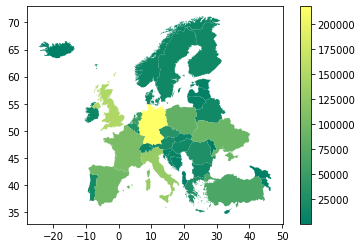

In [ ]:
# The following 2 lines get data for countries in Europe, for the year 2005
temp =emissions_data[emissions_data["Continent"] == 'Europe']
europe_2005 = temp[temp["Year"] == 2005]

missing_list1=[]
temp1 = list(europe_2005['Country'])
map_europe_2005_df= map_df.copy(deep=True)

# We remove any countries in the map df not in our Europe 2005 DF 

for country in map_europe_2005_df['COUNTRY']:
    if country.upper() not in temp1:
        missing_list1.append(country)
missing_list1
map_europe_2005_df = map_europe_2005_df[~map_europe_2005_df.COUNTRY.isin(missing_list1)]

columntoadd=[]
index = 0 
for country in map_europe_2005_df['COUNTRY']:
    columntoadd.append(europe_2005.loc[europe_2005.Country==country.upper(),'Total'].values[0])

# We extract the 'Total' column from our emission 
map_europe_2005_df['Total'] = columntoadd
map_europe_2005_df = map_europe_2005_df[~map_europe_2005_df.COUNTRY.isin(['Greenland'])]
map_europe_2005_df
map_europe_2005_df.plot(column="Total", cmap="summer", legend=True)
plt.show()

In [ ]:
type(map_europe_2005_df)

geopandas.geodataframe.GeoDataFrame

In [ ]:
map_europe_2005_df.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Total
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",1160
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...",157
10,11,Armenia,AM,Armenia,AM,12.161117,3.142291,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...",1187
13,14,Austria,AT,Austria,AT,22.067937,10.039441,"POLYGON ((10.47124 46.87135, 10.48821 46.93599...",20239
20,21,Belarus,BY,Belarus,BY,31.668548,28.157809,"POLYGON ((25.54667 51.92214, 25.43999 51.92222...",16135


##Initial Visualizations

###The first visualization is a snapshot of the emissions by country in Europe in 2005. We will see how this changes throughout the time frame we have established, find out the largest increases+decreases in emissions, and also break this down by industry. 

In [ ]:
map_europe_2005_df.Total.describe()

count        42.000000
mean      31118.333333
std       47685.575022
min         109.000000
25%        2322.500000
50%       12358.000000
75%       28920.500000
max      217393.000000
Name: Total, dtype: float64

In [ ]:
map_europe_2005_df['new_group']= pd.cut(map_europe_2005_df['Total'],  
                                        bins=[0,2300,13000,30000,100000,200000,np.inf],  
                                        labels=['0-2300','2.3k-13k','13k-30k','30k-100k','100k-200k','>200k'])
map_europe_2005_df['new_group'][0:5]

1      0-2300
4      0-2300
10     0-2300
13    13k-30k
20    13k-30k
Name: new_group, dtype: category
Categories (6, object): ['0-2300' < '2.3k-13k' < '13k-30k' < '30k-100k' < '100k-200k' < '>200k']

[Text(394.3183642671518, 0.5, 'Longitude'),
 Text(0.5, 69.0, 'Latitude'),
 Text(0.5, 1.0, 'Million metric tons of CO2 emission per European country in 2005')]

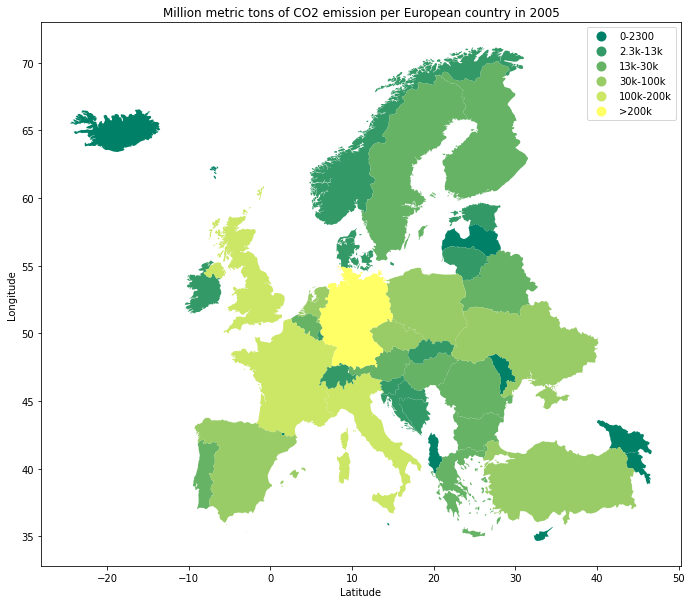

In [ ]:
fig = map_europe_2005_df.plot(column="new_group", cmap="summer", legend=True, figsize=(20, 10))
fig.set(xlabel='Latitude', ylabel='Longitude', title='Million metric tons of CO2 emission per European country in 2005')

### The following is a box plot for the filtered sea level data from 2005 to 2014, which has a minimum value of 38 and a maximum value of 76.

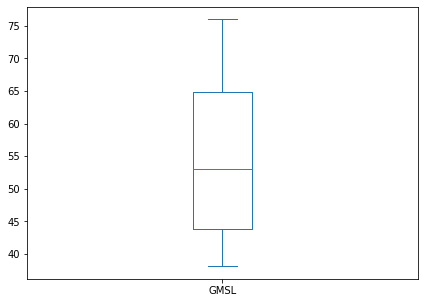

In [ ]:
#ploting the box plot for the filtered data
sea_filter2['GMSL'].plot(kind='box', figsize=(7,5))

The temperature data of each year is the average mean teamperature anomalies in degree Celcius relative to the base period. GISTEMP base period: 1951-1980. GCAG base period: 20th century average. To avoid the fluctuation blurring the whole picture, the graph is plotted smoother line. 

[Text(0, 0.5, 'Temperature difference with base year 1880 (0.1 mm)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Temperature change from 2005-2014')]

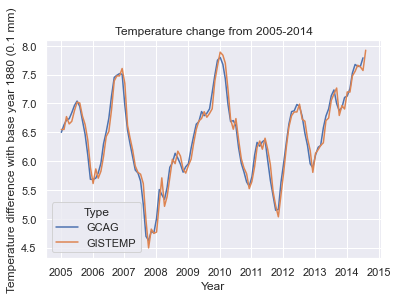

In [266]:
Temp['Year_Roll'] = Temp['Temperature'].rolling(10).sum()
sns.set(font_scale=1)
fig = sns.lineplot(x='Year', y='Year_Roll', data=temp, hue='Type')
fig.set(ylabel = 'Temperature difference with base year 1880 (0.1 mm)', xlabel = 'Year', title='Temperature change from 2005-2014')

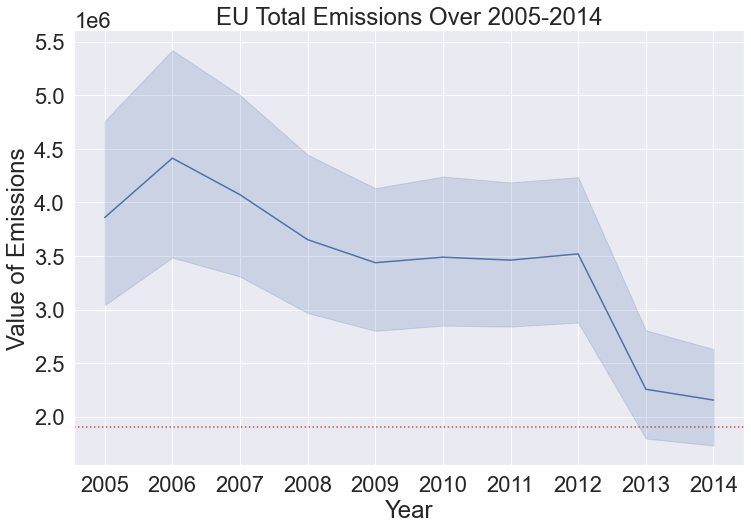

In [462]:
plt.subplots(figsize=(12, 8))
fig = sns.lineplot(x='year', y='value', data=euETS)
fig.set(ylabel = 'Value of Emissions', xlabel = 'Year', title='EU Total Emissions Over 2005-2014')
sns.set(font_scale=2)
plt.axhline(y = 1.9e+6, color = 'r', linestyle = ':')

In [417]:
euETS_2005 = euETS[euETS['year'] == '2005']
euETS_2014 = euETS[euETS['year'] == '2014']

In [430]:
emits_per_country_2005 = euETS_2005.groupby(['country'])['value'].sum()
emits_goal_2030 = emits_per_country_2005.reset_index().set_index('country').div(2)
emits_per_country_2014 = euETS_2014.groupby('country')['value'].sum()

In [435]:
emits_goal_2030 = emits_goal_2030.squeeze()

In [436]:
progress_05_14 = round(((emits_per_country_2005 - emits_per_country_2014) / emits_goal_2030), 4) * 100

In [438]:
progress_05_14_df = progress_05_14.reset_index()

[(-100.0, 120.0),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'European Country working through the emissions reduction to the goal in 2030'),
 Text(0.5, 0, 'Progress(%)')]

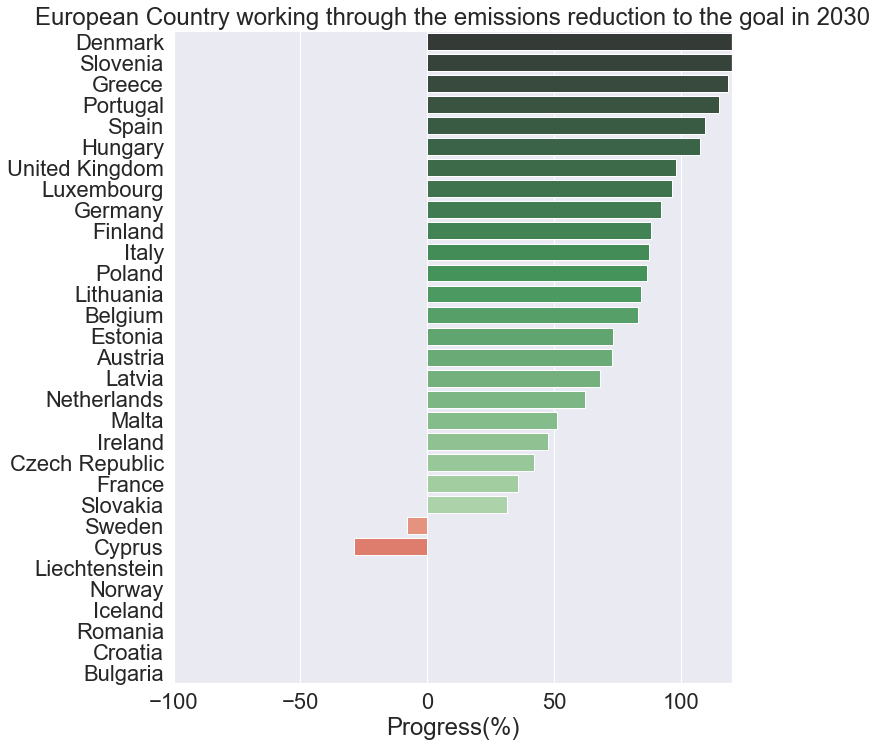

In [440]:
f, ax = plt.subplots(figsize=(10, 12))

temp = list(progress_05_14_df.sort_values('value', ascending=False)['value'])
clrs = []
greens_count=0
reds_count=0
for x in temp:
  if (float(x) < 0):
    clrs.append('red') 
    reds_count+=1
  else:
    clrs.append('green')
    greens_count+=1

pal1 = sns.color_palette("Greens_d", greens_count)
pal2 = sns.color_palette("Reds_d", reds_count)
pal1.reverse() 
pal = pal1+ pal2
sns.barplot(data = progress_05_14_df.sort_values('value', ascending=False),
            y = 'country', x = 'value', palette=pal)


ax.set(xlim=(-100, 120), ylabel="", title = 'European Country working through the emissions reduction to the goal in 2030',
        xlabel="Progress(%)")

[(-1000.0, 150.0),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Progress(%) of working through the emissions reduction to the goal at 2030')]

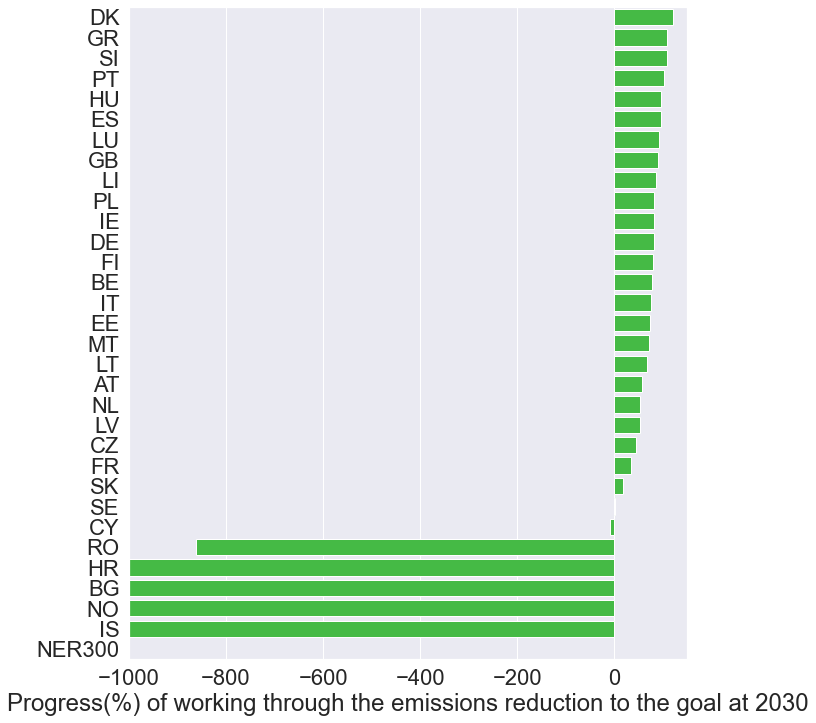

In [403]:
f, ax = plt.subplots(figsize=(10, 12))
sns.barplot(data = progress_05_14_df.sort_values('value', ascending=False),
            y = 'country_code', x = 'value', color = 'limegreen')
ax.set(xlim=(-1000, 150), ylabel="",
       xlabel="Progress(%) of working through the emissions reduction to the goal at 2030")

##Refined Questions w/ Summary Statistics

1. How do European countries compare with global emission levels?
   - We intend to show the European countries immension levels vis-a-vis
     global emissionss level. The initial data and graph would have global
     emisions ploted continent wise, then we would zoom in to the data
     European data to have the visualisation of the major emitters in the
     region.
 
2. Which European countries have reduced emissions the most and by how much?
   - In this question, we will capture the reduction of the emissions
     country wise and plot the top 10 counties whch have successfully
     reduced their emissions.
 
3. Which sectors have reduced emissions the most?
   - Through this question, we intend to capture the emissions sector-wise
     in Europe and their reductions during the analysis period.
 
4. How are emissions across Europe impacted by global targets to fight
   climate change?
   - We will visualize the targets that are highlighted in various
     agreements (Kyoto, Paris, etc..) and analyze how well countries are
     meeting them. Are European countries on track to meet the latest
     climate targets?

###Now we are getting summary statistics to our questions:

1. How do European countries compare with global emission levels?

For 3 years (2005, 2010, 2014) we will calculate the percentage of global emissions that Europe contributes:

In [ ]:
temp =emissions_data[emissions_data["Year"] == 2005]
temp = temp[["Year",'Country','Continent','Total']]
temp1 = temp[temp["Year"] == 2005].groupby(['Year', 'Continent']).sum()

dict_2005_continent_sums={}
index = 0 
for ind in temp1.index:
    dict_2005_continent_sums[temp1.index[index][1]]= temp1.values[index][0]
    index +=1
    
temp =emissions_data[emissions_data["Year"] == 2010]
temp = temp[["Year",'Country','Continent','Total']]
temp1 = temp[temp["Year"] == 2010].groupby(['Year', 'Continent']).sum()

dict_2010_continent_sums={}
index = 0 
for ind in temp1.index:
    dict_2010_continent_sums[temp1.index[index][1]]= temp1.values[index][0]
    index +=1
 
temp =emissions_data[emissions_data["Year"] == 2014]
temp = temp[["Year",'Country','Continent','Total']]
temp1 = temp[temp["Year"] == 2014].groupby(['Year', 'Continent']).sum()

dict_2014_continent_sums={}
index = 0 
for ind in temp1.index:
    dict_2014_continent_sums[temp1.index[index][1]]= temp1.values[index][0]
    index +=1
type(dict_2010_continent_sums['Europe'])
print("Percentage of Global Emissions Contributed by Europe in 2005: ", round(dict_2005_continent_sums['Europe']/sum(list(dict_2005_continent_sums.values())),6)*100,'%')
print("Percentage of Global Emissions Contributed by Europe in 2010: ", round(dict_2010_continent_sums['Europe']/sum(list(dict_2010_continent_sums.values())),6)*100,'%')
print("Percentage of Global Emissions Contributed by Europe in 2014: ", round(dict_2014_continent_sums['Europe']/sum(list(dict_2014_continent_sums.values())),6)*100,'%')

Percentage of Global Emissions Contributed by Europe in 2005:  17.3522 %
Percentage of Global Emissions Contributed by Europe in 2010:  14.466399999999998 %
Percentage of Global Emissions Contributed by Europe in 2014:  11.99 %


2. Which European countries have reduced emissions the most and by how much?

For the second summary statistic, we will see which European country has reduced their emissions the most and which the least between 2005 and 2014:

In [95]:
temp = emissions_data[emissions_data["Continent"] == 'Europe']
europe_2014 = temp[temp["Year"] == 2014]
europe_2014 = europe_2014[~europe_2014.Country.isin(['BONAIRE','LIECHTENSTEIN','MONTENEGRO','SERBIA'])]
europe_2014_list = list(europe_2014['Total'])
europe_2005_list =list(europe_2005['Total'])
index = 0 
diff_list = []
diff_dict={}
country_list = list(europe_2014['Country'])
for val in europe_2014_list:
    diff_dict[country_list[index]] = (europe_2014_list[index]-europe_2005_list[index])
    index +=1

NameError: name 'europe_2005' is not defined

In [ ]:
print(min(diff_dict, key=diff_dict.get),':', diff_dict[min(diff_dict, key=diff_dict.get)],'million metric tons of C')

ITALY : -41716 million metric tons of C


In [ ]:
print(max(diff_dict, key=diff_dict.get),':', diff_dict[max(diff_dict, key=diff_dict.get)],'million metric tons of C')

TURKIYE : 29613 million metric tons of C


### Change of emissions by Sectors in Sweden and Denmark

In [497]:
""" def country_invest(country):
    country_df = euETS[(euETS['country'] == country) & ((euETS['year'] == '2005') | (euETS['year'] == '2014'))]
    crosstab_country = country_df.groupby(['year', 'main_activity_sector_name']).aggregate({'value':'sum'}).reset_index()
    country_less_emissions = crosstab_country[crosstab_country['value'] < 1e+07]
    country_df['new_sector'] = country_df['main_activity_sector_name'].replace(list(country_less_emissions['main_activity_sector_name']),'Other Sectors')
    agg_value = country_df.groupby(['year', 'new_sector'])['value'].sum().unstack().fillna(0)
    
    agg_value.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Change of emissions by Sectors in {country}')
    plt.xticks(rotation=0, ha='center')
    plt.xlabel('year')
    plt.ylabel('Amount of Emissions (10 Million)')
    sns.set(font_scale=1) """


3. Which sectors have reduced emissions the most?

In [ ]:
by_sector = euETS.groupby('main_activity_sector_name').aggregate({'value':'sum'})
by_sector = by_sector.drop(['20-99 All stationary installations', '21-99 All industrial installations (excl. combustion)'], axis=0)
by_sector['percent(%)'] = round(by_sector / sum(by_sector.values) * 100, 2)
by_sector

,value,percent(%)
main_activity_sector_name,,
10 Aviation,1.015672e+09,1.10
20 Combustion of fuels,6.188554e+10,66.77
21 Refining of mineral oil,6.593969e+09,7.11
22 Production of coke,4.025113e+08,0.43
23 Metal ore roasting or sintering,2.370005e+08,0.26
24 Production of pig iron or steel,6.876331e+09,7.42
25 Production or processing of ferrous metals,2.287253e+08,0.25
26 Production of primary aluminium,7.907807e+07,0.09
27 Production of secondary aluminium,9.751631e+06,0.01


##References

1. Down To Earth: https://www.downtoearth.org.in/climate-change/coplist

2. Intergovernmental Panel on Climate Change (IPCC): https://www.ipcc.ch/site/assets/uploads/sites/2/2018/12/SR15_FAQ_Low_Res.pdf

3. Rhodium Group; Pathways to Paris: A Policy Assessment of the 2030 US Climate Target: https://rhg.com/research/us-climate-policy-2030/#:~:text=As%20part%20of%20this%20effort,below%202005%20levels%20by%202030.

4. United Nations Framework Convention on Climate Change: https://unfccc.int/process/the-convention/history-of-the-convention#Climate-Change-in-context

5. Yale Climate Connections; The top 10 global weather and climate change events of 2021: https://yaleclimateconnections.org/2022/01/the-top-10-global-weather-and-climate-change-events-of-2021/

### Dive into the countries that improved the most and the least, and try to see which sectors are doing good and which are not.

In [150]:
filename = 'spain_industry_data.csv'  
filename2 = 'norway_industry_data.csv'

In [151]:
# Load in the industrial-wise data for the most improved country
Spain = pd.read_csv(filename)
Spain.head()

,Country,Sectors,Year,Emissions,% Difference in Emissions,Difference in Emissions,Absolute change since 1990,Percentage change since 1990,Index (1990=100)
0,Spain,Agriculture,1990,"597,845",NaN,NaN,0,0.00%,100.0
1,Spain,Agriculture,1991,"547,364",-8.44%,"-50,481","-50,481",-8.44%,92.0
2,Spain,Agriculture,1992,"538,445",-1.63%,"-8,919","-59,400",-9.94%,90.0
3,Spain,Agriculture,1993,"484,130",-10.09%,"-54,315","-113,715",-19.02%,81.0
4,Spain,Agriculture,1994,"516,432",6.67%,"32,302","-81,413",-13.62%,86.0


In [152]:
# Load in the industrial-wise data for one of the least improved country
Norway = pd.read_csv(filename2)
Norway.head()

,Country,Sectors,Year,Emissions,% Difference in Emissions,Difference in Emissions,Absolute change since 1990,Percentage change since 1990,Index (1990=100)
0,Norway,Agriculture,1990,"231,524",NaN,NaN,0,0.00%,100
1,Norway,Agriculture,1991,"201,195",-13.10%,"-30,329","-30,329",-13.10%,87
2,Norway,Agriculture,1992,"166,204",-17.39%,"-34,991","-65,320",-28.21%,72
3,Norway,Agriculture,1993,"193,819",16.62%,"27,615","-37,705",-16.29%,84
4,Norway,Agriculture,1994,"173,723",-10.37%,"-20,096","-57,801",-24.97%,75


Plot out the stacked bar for emissions data from each sectors in Spanish.

In [217]:
def by_sectors_spa(country):
    country['new_sector'] = country['Sectors'].replace(['Agriculture', 'Waste', 'Other combustion', 'International Aviation'],'Other Sectors')
    country_df = country[(country['Country'] == 'Spain') & ((country['Year'] == 2005) | (country['Year'] == 2014))]
    country_df.Emissions = country_df.Emissions.str.replace(',', '').astype(float)
    agg_value = country_df.groupby(['Year', 'new_sector'])['Emissions'].sum().unstack().fillna(0)

    agg_value.plot(kind='bar', stacked=True, figsize=(6, 8), cmap='GnBu_r')
    plt.title('Total emissions by Sectors in Spain')
    plt.xticks(rotation=0, ha='center')
    plt.xlabel('year')
    plt.ylabel('Million tons of C')
    sns.set(font_scale=1)
    plt.grid(False)

/var/folders/zs/j91wn79j45lccf78212k1pp80000gn/T/ipykernel_1206/3772275790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df.Emissions = country_df.Emissions.str.replace(',', '').astype(float)


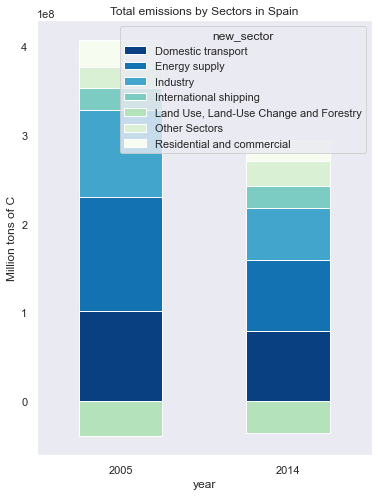

In [218]:
by_sectors_spa(Spain)

Plot out the stacked bar for emissions data from each sectors in Norway. 

In [211]:
def by_sectors_nor(country):
    country['new_sector'] = country['Sectors'].replace(['Agriculture', 'Waste', 'Other combustion', 'International Aviation'],'Other Sectors')
    country_df = country[(country['Country'] == 'Norway') & ((country['Year'] == 2005) | (country['Year'] == 2014))]
    country_df.Emissions = country_df.Emissions.str.replace(',', '').astype(float)
    agg_value = country_df.groupby(['Year', 'new_sector'])['Emissions'].sum().unstack().fillna(0)
    
    agg_value.plot(kind='bar', stacked=True, figsize=(6, 8), legend = None, cmap='GnBu_r')
    plt.title('Total emissions by Sectors in Norway')
    plt.xticks(rotation=0, ha='center')
    plt.xlabel('year')
    plt.ylabel('Million tons of C')
    sns.set(font_scale=1)
    plt.grid(False)

/var/folders/zs/j91wn79j45lccf78212k1pp80000gn/T/ipykernel_1206/1387509745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df.Emissions = country_df.Emissions.str.replace(',', '').astype(float)


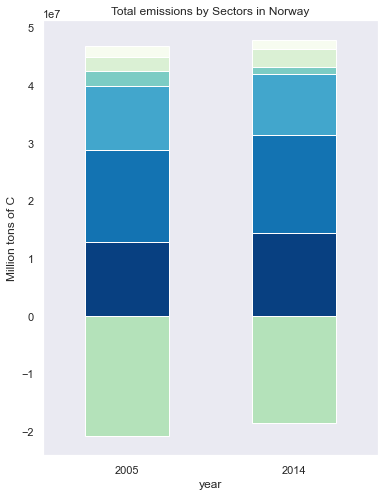

In [212]:
by_sectors_nor(Norway)